## STYLE TRANSFER
In this project, we work on transferring styles like the Ghibli style to images using a style transfer model from TensorFlow Hub.


### Importing Libraries

This section imports libraries for machine learning (`tensorflow`, `tensorflow_hub`), image processing (`PIL`, `numpy`), visualization (`matplotlib.pyplot`), and file handling in Colab (`google.colab.files`).

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

### Loading the Model and Defining Functions

This line is crucial for the style transfer process. It loads a pre-trained machine learning model from TensorFlow Hub.

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

This code block defines a function called load_image which is designed to prepare an image for use with the style transfer model.

In [ ]:
def load_image(img_path, max_dim):
  img = Image.open(img_path).convert('RGB') # loading the image
  img.thumbnail((max_dim, max_dim)) # resizing the image
  arr = np.array(img) / 255.0 # converting to a number array
  return tf.expand_dims(arr.astype(np.float32), axis=0)

This code block defines a function called stylize which performs the core style transfer operation.

In [ ]:
def stylize(content_path, style_path, content_max=512, style_max=256):
  content = load_image(content_path, content_max)
  style = load_image(style_path, style_max)
  outputs = model(tf.constant(content), tf.constant(style)) #vectorizing
  stylized = outputs[0][0].numpy()
  stylized = (stylized*255).clip(0,255).astype(np.uint8)
  return Image.fromarray(stylized) #converting the number array back to visual format and returning it

### Uploading Files

This code snippet manages the process of uploading the "content" image you want to apply a style to. The files.upload() command opens a file upload window, allowing you to select an image from your computer, and it then takes the name of the uploaded file and saves it in the content_path variable.

In [ ]:
print('Upload content file.')
uploaded = files.upload()
content_path = list(uploaded.keys())[0]

İçerik dosyasını yükleyin.


Saving kuzey2.jpg to kuzey2.jpg


This code block handles the upload of your "style" image. It first prints a message asking you to upload the file. Then, files.upload() opens a file browser for you to select the image from your computer. Finally, it takes the name of the uploaded file and stores it in the style_path variable for later use in the style transfer process.

In [ ]:
print('Upload style file.')
uploaded = files.upload()
style_path = list(uploaded.keys())[0]

Stil dosyasını yükleyin.


Saving ghibli 4.png to ghibli 4.png


### Performing Style Transfer

This section of the code performs the actual style transfer using the functions and model loaded previously.

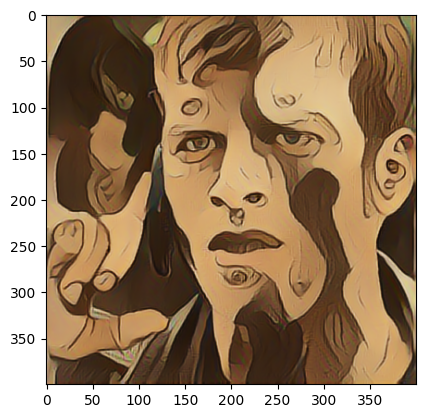

In [ ]:
result = stylize(content_path, style_path)
plt.imshow(result)

### Saving Results

This section of the code takes the image that has been generated by the style transfer process and saves it to a file, and then makes that file available for you to download.

In [ ]:
result.save('result.jpg')
files.download('result.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>